In [1]:
from random import random

### Classe Produto

In [21]:
class Produto():
    def __init__(self, nome, espaco, valor):
        self.nome = nome
        self.espaco = espaco
        self.valor = valor

### Classe Indivíduo

In [22]:
class Individuo():
    def __init__(self, espacos, valores, limite_espacos, geracao=0):
        self.espacos = espacos
        self.valores = valores
        self.limite_espacos = limite_espacos
        self.nota_avaliacao = 0
        self.espaco_usado = 0
        self.geracao = geracao
        self.cromossomo = []
        
        for i in range(len(espacos)):
            if random() < 0.5:
                self.cromossomo.append("0")
            else:
                self.cromossomo.append("1")
                
    def avaliacao(self):
        nota = 0
        soma_espacos = 0
        for i in range(len(self.cromossomo)):
           if self.cromossomo[i] == '1':
               nota += self.valores[i]
               soma_espacos += self.espacos[i]
        if soma_espacos > self.limite_espacos:
            nota = 1
        self.nota_avaliacao = nota
        self.espaco_usado = soma_espacos
        
    def crossover(self, outro_individuo):
        corte = round(random()  * len(self.cromossomo))
        
        filho1 = outro_individuo.cromossomo[0:corte] + self.cromossomo[corte::]
        filho2 = self.cromossomo[0:corte] + outro_individuo.cromossomo[corte::]
        
        filhos = [Individuo(self.espacos, self.valores, self.limite_espacos, self.geracao + 1),
                  Individuo(self.espacos, self.valores, self.limite_espacos, self.geracao + 1)]
        filhos[0].cromossomo = filho1
        filhos[1].cromossomo = filho2
        return filhos
    
    def mutacao(self, taxa_mutacao):
        for i in range(len(self.cromossomo)):
            if random() < taxa_mutacao:
                if self.cromossomo[i] == '1':
                    self.cromossomo[i] = '0'
                else:
                    self.cromossomo[i] = '1'
        return self

### Algoritmo Genético

In [23]:
class AlgoritmoGenetico():
    def __init__(self, tamanho_populacao):
        self.tamanho_populacao = tamanho_populacao
        self.populacao = []
        self.geracao = 0
        self.melhor_solucao = 0
        self.lista_solucoes = []
        
    def inicializa_populacao(self, espacos, valores, limite_espacos):
        for i in range(self.tamanho_populacao):
            self.populacao.append(Individuo(espacos, valores, limite_espacos))
        self.melhor_solucao = self.populacao[0]
    
    def ordena_populacao(self):
        self.populacao = sorted(self.populacao, key = lambda populacao: populacao.nota_avaliacao,
                               reverse = True)
    
    def melhor_individuo(self, individuo):
        if individuo.nota_avaliacao > self.melhor_solucao.nota_avaliacao:
            self.melhor_solucao = individuo
            
    def soma_avaliacoes(self):
        soma = 0
        for individuo in self.populacao:
            soma += individuo.nota_avaliacao
        return soma
    
    def seleciona_pai(self, soma_avaliacao):
        pai = -1
        valor_sorteado = random() * soma_avaliacao
        soma = 0
        i = 0
        while i < len(self.populacao) and soma < valor_sorteado:
            soma += self.populacao[i].nota_avaliacao
            pai += 1
            i += 1
        return pai
    
    def visualiza_geracao(self):
        melhor = self.populacao[0]
        print("G: %s -> Valor: %s Espaço: %s Cromossomo: %s" % (self.populacao[0].geracao,
                                                               melhor.nota_avaliacao,
                                                               melhor.espaco_usado,
                                                               melhor.cromossomo))
    
    def resolver(self, taxa_mutacao, numero_geracoes, espacos, valores, limite_espacos):
        self.inicializa_populacao(espacos, valores, limite_espacos)
        
        for individuo in self.populacao:
            individuo.avaliacao()
        
        self.ordena_populacao()
        self.melhor_solucao = self.populacao[0]
        self.lista_solucoes.append(self.melhor_solucao.nota_avaliacao)
        
        self.visualiza_geracao()
        
        for geracao in range(numero_geracoes):
            soma_avaliacao = self.soma_avaliacoes()
            nova_populacao = []
            
            for individuos_gerados in range(0, self.tamanho_populacao, 2):
                pai1 = self.seleciona_pai(soma_avaliacao)
                pai2 = self.seleciona_pai(soma_avaliacao)
                
                filhos = self.populacao[pai1].crossover(self.populacao[pai2])
                
                nova_populacao.append(filhos[0].mutacao(taxa_mutacao))
                nova_populacao.append(filhos[1].mutacao(taxa_mutacao))
            
            self.populacao = list(nova_populacao)
            
            for individuo in self.populacao:
                individuo.avaliacao()
            
            self.ordena_populacao()
            
            self.visualiza_geracao()
            
            melhor = self.populacao[0]
            self.lista_solucoes.append(melhor.nota_avaliacao)
            self.melhor_individuo(melhor)
        
        print("\nMelhor solução -> G: %s Valor: %s Espaço: %s Cromossomo: %s" %
              (self.melhor_solucao.geracao,
               self.melhor_solucao.nota_avaliacao,
               self.melhor_solucao.espaco_usado,
               self.melhor_solucao.cromossomo))
        
        return self.melhor_solucao.cromossomo
        
        

### Programa Principal

In [25]:
lista_produtos = []
lista_produtos.append(Produto("Geladeira Dako", 0.751, 999.90))
lista_produtos.append(Produto("Iphone 6", 0.0000899, 2911.12))
lista_produtos.append(Produto("TV 55' ", 0.400, 4346.99))
lista_produtos.append(Produto("TV 50' ", 0.290, 3999.90))
lista_produtos.append(Produto("TV 42' ", 0.200, 2999.00))
lista_produtos.append(Produto("Notebook Dell", 0.00350, 2499.90))
lista_produtos.append(Produto("Ventilador Panasonic", 0.496, 199.90))
lista_produtos.append(Produto("Microondas Electrolux", 0.0424, 308.66))
lista_produtos.append(Produto("Microondas LG", 0.0544, 429.90))
lista_produtos.append(Produto("Microondas Panasonic", 0.0319, 299.29))
lista_produtos.append(Produto("Geladeira Brastemp", 0.635, 849.00))
lista_produtos.append(Produto("Geladeira Consul", 0.870, 1199.89))
lista_produtos.append(Produto("Notebook Lenovo", 0.498, 1999.90))
lista_produtos.append(Produto("Notebook Asus", 0.527, 3999.00))

espacos = []
valores = []
nomes = []

for produto in lista_produtos:
    espacos.append(produto.espaco)
    valores.append(produto.valor)
    nomes.append(produto.nome)
    
limite = 3
tamanho_populacao = 20
taxa_mutacao = 0.01
numero_geracoes = 100

ag = AlgoritmoGenetico(tamanho_populacao)

resultado = ag.resolver(taxa_mutacao, numero_geracoes, espacos, valores, limite)


G: 0 -> Valor: 18194.37 Espaço: 2.9688899 Cromossomo: ['1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1']
G: 1 -> Valor: 18115.36 Espaço: 2.7389899 Cromossomo: ['0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0']
G: 2 -> Valor: 19495.370000000003 Espaço: 1.4883899 Cromossomo: ['0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0']
G: 3 -> Valor: 21534.890000000003 Espaço: 2.9828899 Cromossomo: ['0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0']
G: 4 -> Valor: 21534.890000000003 Espaço: 2.9828899 Cromossomo: ['0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0']
G: 5 -> Valor: 22034.81 Espaço: 2.1099899 Cromossomo: ['0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1']
G: 6 -> Valor: 21185.81 Espaço: 1.4749899 Cromossomo: ['0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1']
G: 7 -> Valor: 21485.100000000002 Espaço: 1.5068899 Cromossomo: ['0', '1', '1', '1', '1', '1', 

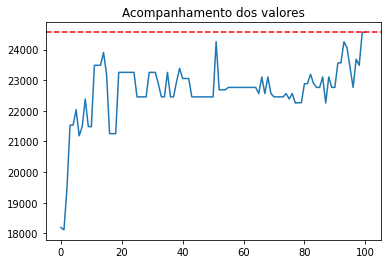

In [30]:
import matplotlib.pyplot as plt
plt.plot(ag.lista_solucoes)
plt.axhline(y=ag.melhor_solucao.nota_avaliacao, color='r', linestyle='--')
plt.title("Acompanhamento dos valores")
plt.show() 